In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [2]:
# Read MA PPE data
df = pd.read_csv('covid_19_region.csv', parse_dates=['Time'])
df.drop(['Total Persons Tested','Percent Positivity','Deaths'], axis=1, inplace=True)
df = df.loc[df['Region']!='State Agency'].dropna(how='all')
df

,Time,Region,N95s/KN95s,Masks,Gowns,Gloves,Ventilators,Confirmed Cases,Hospitalized Total,Hospitalized ICU
0,2020-04-29,Central Massachusetts,1.383500e+05,263767.0,43293.0,454250.0,79.0,5363.0,316.0,95.0
1,2020-04-30,Central Massachusetts,1.468200e+05,269267.0,43573.0,457450.0,79.0,NaN,334.0,95.0
2,2020-05-01,Central Massachusetts,1.578000e+05,276767.0,43838.0,472050.0,79.0,NaN,329.0,93.0
3,2020-05-02,Central Massachusetts,1.619600e+05,277517.0,44658.0,480450.0,79.0,NaN,321.0,93.0
4,2020-05-03,Central Massachusetts,1.619600e+05,277517.0,44658.0,480450.0,79.0,NaN,320.0,89.0
5,2020-05-04,Central Massachusetts,1.634600e+05,282217.0,46432.0,484950.0,79.0,NaN,315.0,92.0
6,2020-05-05,Central Massachusetts,1.661240e+05,288517.0,46602.0,485650.0,79.0,NaN,301.0,92.0
7,2020-05-06,Central Massachusetts,1.701440e+05,292767.0,46627.0,794650.0,79.0,7056.0,295.0,94.0
8,2020-05-07,Central Massachusetts,1.719240e+05,297017.0,46902.0,807550.0,79.0,NaN,296.0,92.0
9,2020-05-08,Central Massachusetts,1.737840e+05,308267.0,47110.0,818550.0,79.0,NaN,308.0,94.0


In [3]:
# df['Time']
daterange = pd.date_range(start='2020-04-29', end='2020-08-12', freq='7D')
daterange_ex = pd.date_range(start='2020-06-03', end='2020-06-17', freq='7D')
df = df[df['Time'].isin(daterange)]
df = df[~df['Time'].isin(daterange_ex)]
df.head(10)
timeline = df['Time'].reset_index(drop=True)
timeline[0:12]

0    2020-04-29
1    2020-05-06
2    2020-05-13
3    2020-05-20
4    2020-05-27
5    2020-06-24
6    2020-07-01
7    2020-07-08
8    2020-07-15
9    2020-07-22
10   2020-07-29
11   2020-08-05
Name: Time, dtype: datetime64[ns]

In [4]:
df1 = df[df['Time']==timeline[0]]

In [5]:
df1['Pop'] = [858028, 722023, 1579924, 1288824, 1266819, 831991, 6547629]
df1

,Time,Region,N95s/KN95s,Masks,Gowns,Gloves,Ventilators,Confirmed Cases,Hospitalized Total,Hospitalized ICU,Pop
0,2020-04-29,Central Massachusetts,138350.0,263767.0,43293.0,454250.0,79.0,5363.0,316.0,95.0,858028
40,2020-04-29,Metro Boston,94235.0,130800.0,23036.0,465692.0,204.0,12539.0,1194.0,388.0,722023
80,2020-04-29,Metro West,212466.0,373412.0,50610.0,372180.0,136.0,12601.0,1136.0,291.0,1579924
120,2020-04-29,Northeastern Massachusetts,113720.0,226198.0,22974.0,335932.0,117.0,14920.0,488.0,108.0,1288824
160,2020-04-29,Southeastern Massachusetts,234696.0,408835.0,66317.0,686220.0,79.0,9446.0,466.0,89.0,1266819
200,2020-04-29,Western Massachusetts,156323.0,300642.0,50128.0,324630.0,60.0,5052.0,254.0,40.0,831991
280,2020-04-29,Massachusetts,990826.0,1863412.0,285795.0,3987284.0,675.0,60265.0,NaN,NaN,6547629


In [6]:
from scipy import stats

In [7]:
stats.pearsonr(df1['Gloves'], df1['Pop'])

(0.9853624332412501, 4.939829798638943e-05)

In [8]:
df.loc[df['Region']=='Central Massachusetts', 'Pop'] = 858028
df.loc[df['Region']=='Metro Boston', 'Pop'] = 722023
df.loc[df['Region']=='Metro West', 'Pop'] = 1579924
df.loc[df['Region']=='Northeastern Massachusetts', 'Pop'] = 1288824
df.loc[df['Region']=='Southeastern Massachusetts', 'Pop'] = 1266819
df.loc[df['Region']=='Western Massachusetts', 'Pop'] = 831991
df.loc[df['Region']=='Massachusetts', 'Pop'] = 6547629
df

,Time,Region,N95s/KN95s,Masks,Gowns,Gloves,Ventilators,Confirmed Cases,Hospitalized Total,Hospitalized ICU,Pop
0,2020-04-29,Central Massachusetts,1.383500e+05,263767.0,43293.0,454250.0,79.0,5363.0,316.0,95.0,858028.0
7,2020-05-06,Central Massachusetts,1.701440e+05,292767.0,46627.0,794650.0,79.0,7056.0,295.0,94.0,858028.0
14,2020-05-13,Central Massachusetts,1.842200e+05,350367.0,54390.0,858250.0,79.0,8335.0,287.0,92.0,858028.0
21,2020-05-20,Central Massachusetts,1.912800e+05,364617.0,60380.0,889350.0,79.0,9857.0,269.0,75.0,858028.0
28,2020-05-27,Central Massachusetts,2.205340e+05,392367.0,69922.0,905950.0,83.0,10743.0,253.0,74.0,858028.0
32,2020-06-24,Central Massachusetts,2.465090e+05,465367.0,84339.0,1007650.0,83.0,12001.0,84.0,17.0,858028.0
33,2020-07-01,Central Massachusetts,2.480490e+05,472067.0,88739.0,1013850.0,83.0,12148.0,47.0,13.0,858028.0
34,2020-07-08,Central Massachusetts,2.492290e+05,474167.0,90249.0,1015450.0,83.0,12296.0,53.0,12.0,858028.0
35,2020-07-15,Central Massachusetts,2.546590e+05,493317.0,93149.0,1026050.0,83.0,12409.0,33.0,3.0,858028.0
36,2020-07-22,Central Massachusetts,4.259690e+05,687317.0,93149.0,1027050.0,83.0,12541.0,27.0,5.0,858028.0


In [9]:
df['Masks/Pop'] = df['Masks']/df['Pop']
df['N95s/KN95s/Pop'] = df['N95s/KN95s']/df['Pop']
df['Gowns/Pop'] = df['Gowns']/df['Pop']
df['Gloves/Pop'] = df['Gloves']/df['Pop']
df['Ventilators/Pop'] = df['Ventilators']/df['Pop']

Text(0.5, 1.0, 'N95s/KN95s Cumulative Distribution Normalized by Population in Massachusetts')

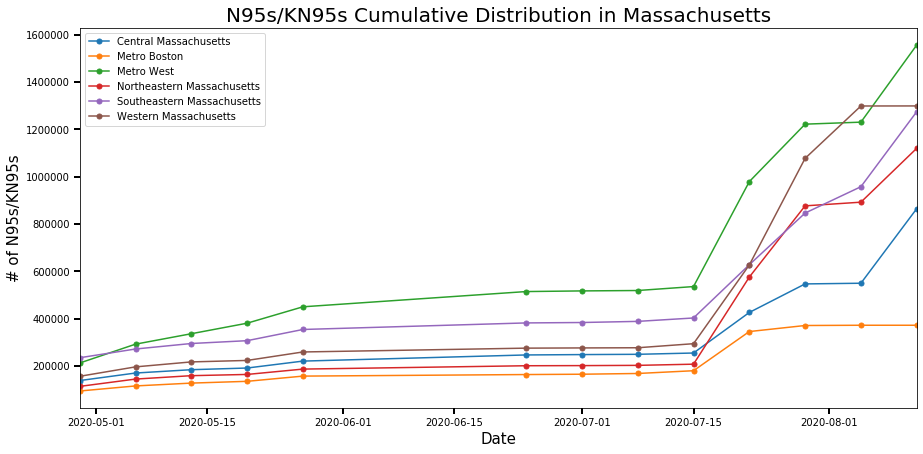

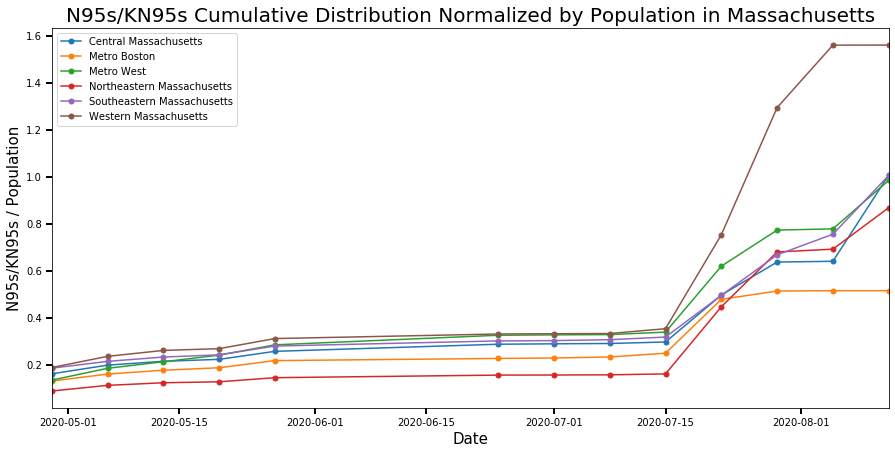

In [10]:
df_cm = df.loc[df['Region']=='Central Massachusetts']
df_mb = df.loc[df['Region']=='Metro Boston']
df_mw = df.loc[df['Region']=='Metro West']
df_nm = df.loc[df['Region']=='Northeastern Massachusetts']
df_sm = df.loc[df['Region']=='Southeastern Massachusetts']
df_wm = df.loc[df['Region']=='Western Massachusetts']
regions = ['Central Massachusetts', 'Metro Boston', 'Metro West', 'Northeastern Massachusetts', 
          'Southeastern Massachusetts', 'Western Massachusetts']
df_regions = [df_cm, df_mb, df_mw, df_nm, df_sm, df_wm]

fig, ax1 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax1.plot('Time', 'N95s/KN95s', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('# of N95s/KN95s', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,8,12)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('N95s/KN95s Cumulative Distribution in Massachusetts', fontsize=20)


fig, ax2 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax2.plot('Time', 'N95s/KN95s/Pop', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('N95s/KN95s / Population', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,8,12)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('N95s/KN95s Cumulative Distribution Normalized by Population in Massachusetts', fontsize=20)

### Rank of Population
Metro West<br>
Northeastern Massachusetts<br>
Southeastern Massachusetts<br>
Central Massachusetts<br>
Western Massachusetts<br>
Metro Boston

Text(0.5, 1.0, 'Masks Cumulative Distribution Normalized by Population in Massachusetts')

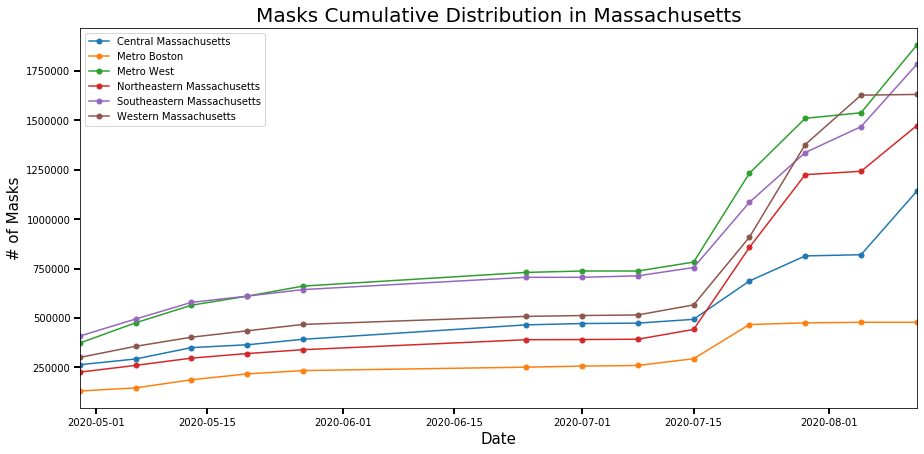

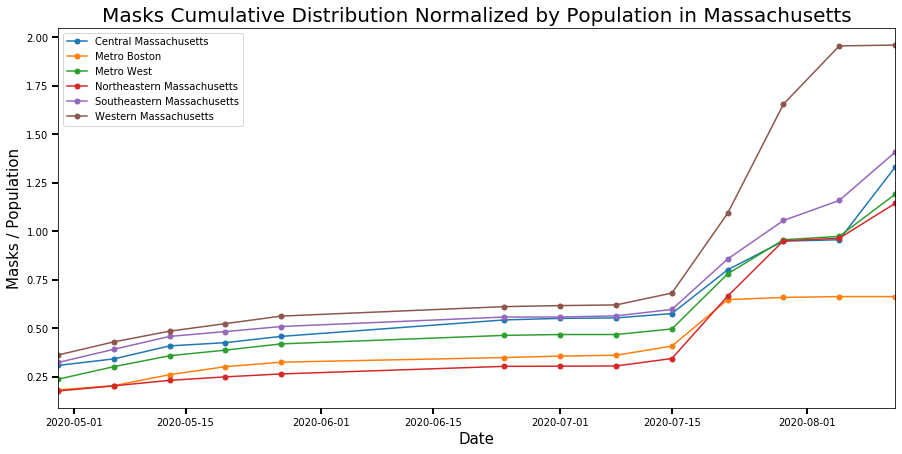

In [11]:
fig, ax1 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax1.plot('Time', 'Masks', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('# of Masks', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,8,12)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('Masks Cumulative Distribution in Massachusetts', fontsize=20)


fig, ax2 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax2.plot('Time', 'Masks/Pop', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Masks / Population', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,8,12)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('Masks Cumulative Distribution Normalized by Population in Massachusetts', fontsize=20)

### Rank of Population
Metro West<br>
Northeastern Massachusetts<br>
Southeastern Massachusetts<br>
Central Massachusetts<br>
Western Massachusetts<br>
Metro Boston

Text(0.5, 1.0, 'Gowns Cumulative Distribution Normalized by Population in Massachusetts')

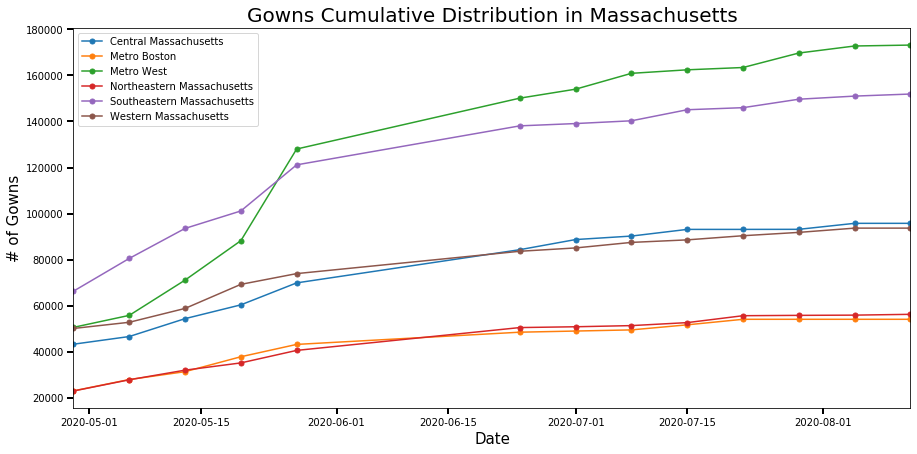

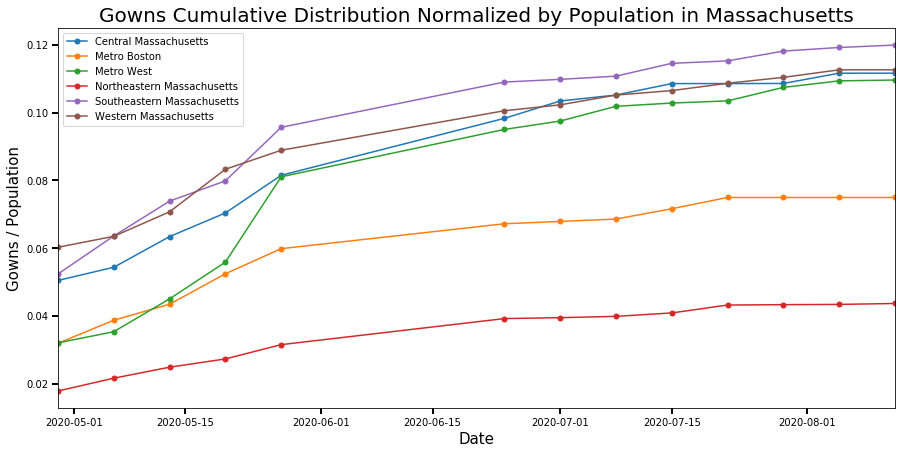

In [12]:
fig, ax1 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax1.plot('Time', 'Gowns', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('# of Gowns', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,8,12)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('Gowns Cumulative Distribution in Massachusetts', fontsize=20)


fig, ax2 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax2.plot('Time', 'Gowns/Pop', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Gowns / Population', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,8,12)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('Gowns Cumulative Distribution Normalized by Population in Massachusetts', fontsize=20)

### Rank of Population
Metro West<br>
Northeastern Massachusetts<br>
Southeastern Massachusetts<br>
Central Massachusetts<br>
Western Massachusetts<br>
Metro Boston

Text(0.5, 1.0, 'Gloves Cumulative Distribution Normalized by Population in Massachusetts')

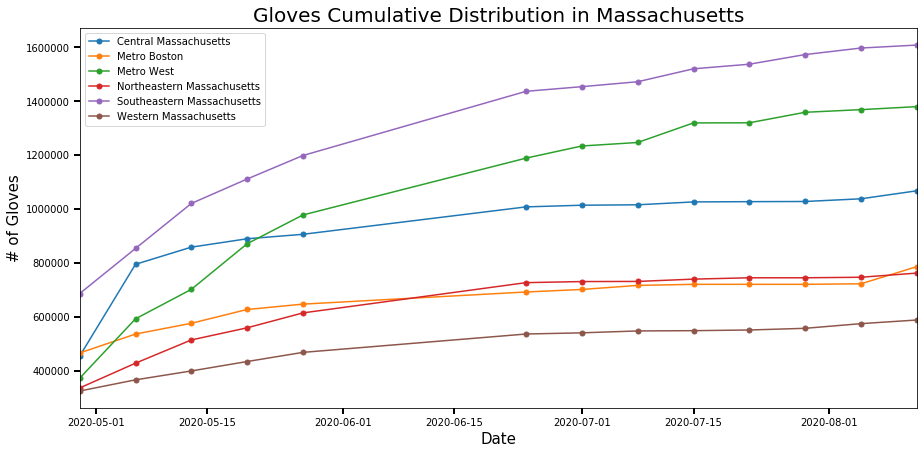

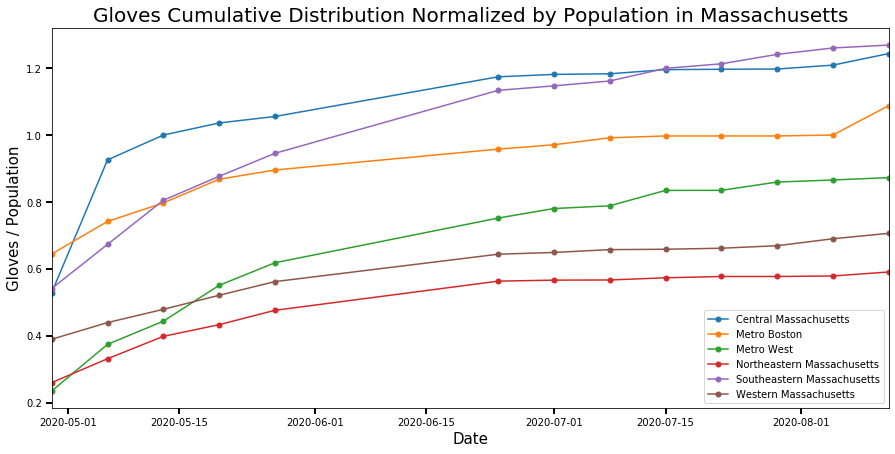

In [13]:
fig, ax1 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax1.plot('Time', 'Gloves', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('# of Gloves', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,8,12)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('Gloves Cumulative Distribution in Massachusetts', fontsize=20)


fig, ax2 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax2.plot('Time', 'Gloves/Pop', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Gloves / Population', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,8,12)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('Gloves Cumulative Distribution Normalized by Population in Massachusetts', fontsize=20)

### Rank of Population
Metro West<br>
Northeastern Massachusetts<br>
Southeastern Massachusetts<br>
Central Massachusetts<br>
Western Massachusetts<br>
Metro Boston